In [5]:
from image_transforms import clahe_rgb, equalize_hist_rgb, show_img_hist
from matplotlib import pyplot as plt
import cv2
import numpy as np

### Step 1: Display the Original Image

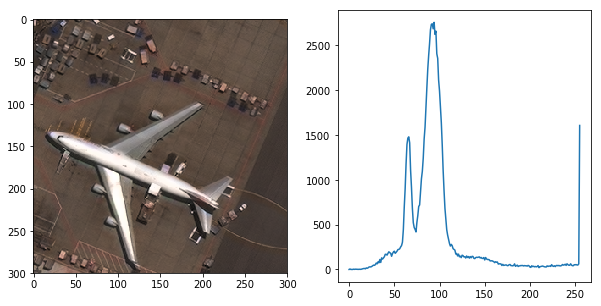

In [6]:
test_img = 'train_images/1095.tif'

img = plt.imread(test_img)[1600:1900, 500:800]
show_img_hist(img)

### Step 2: Equalize Histogram

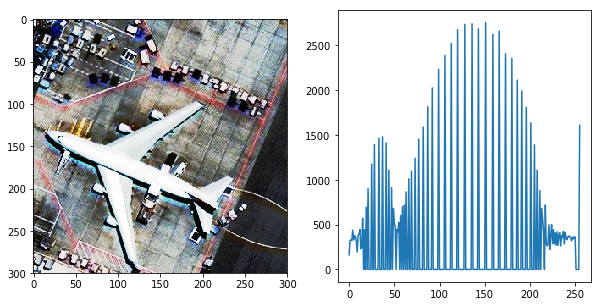

In [7]:
equ = equalize_hist_rgb(img)
show_img_hist(equ)

### Step 3: Show various CLAHE parameter options

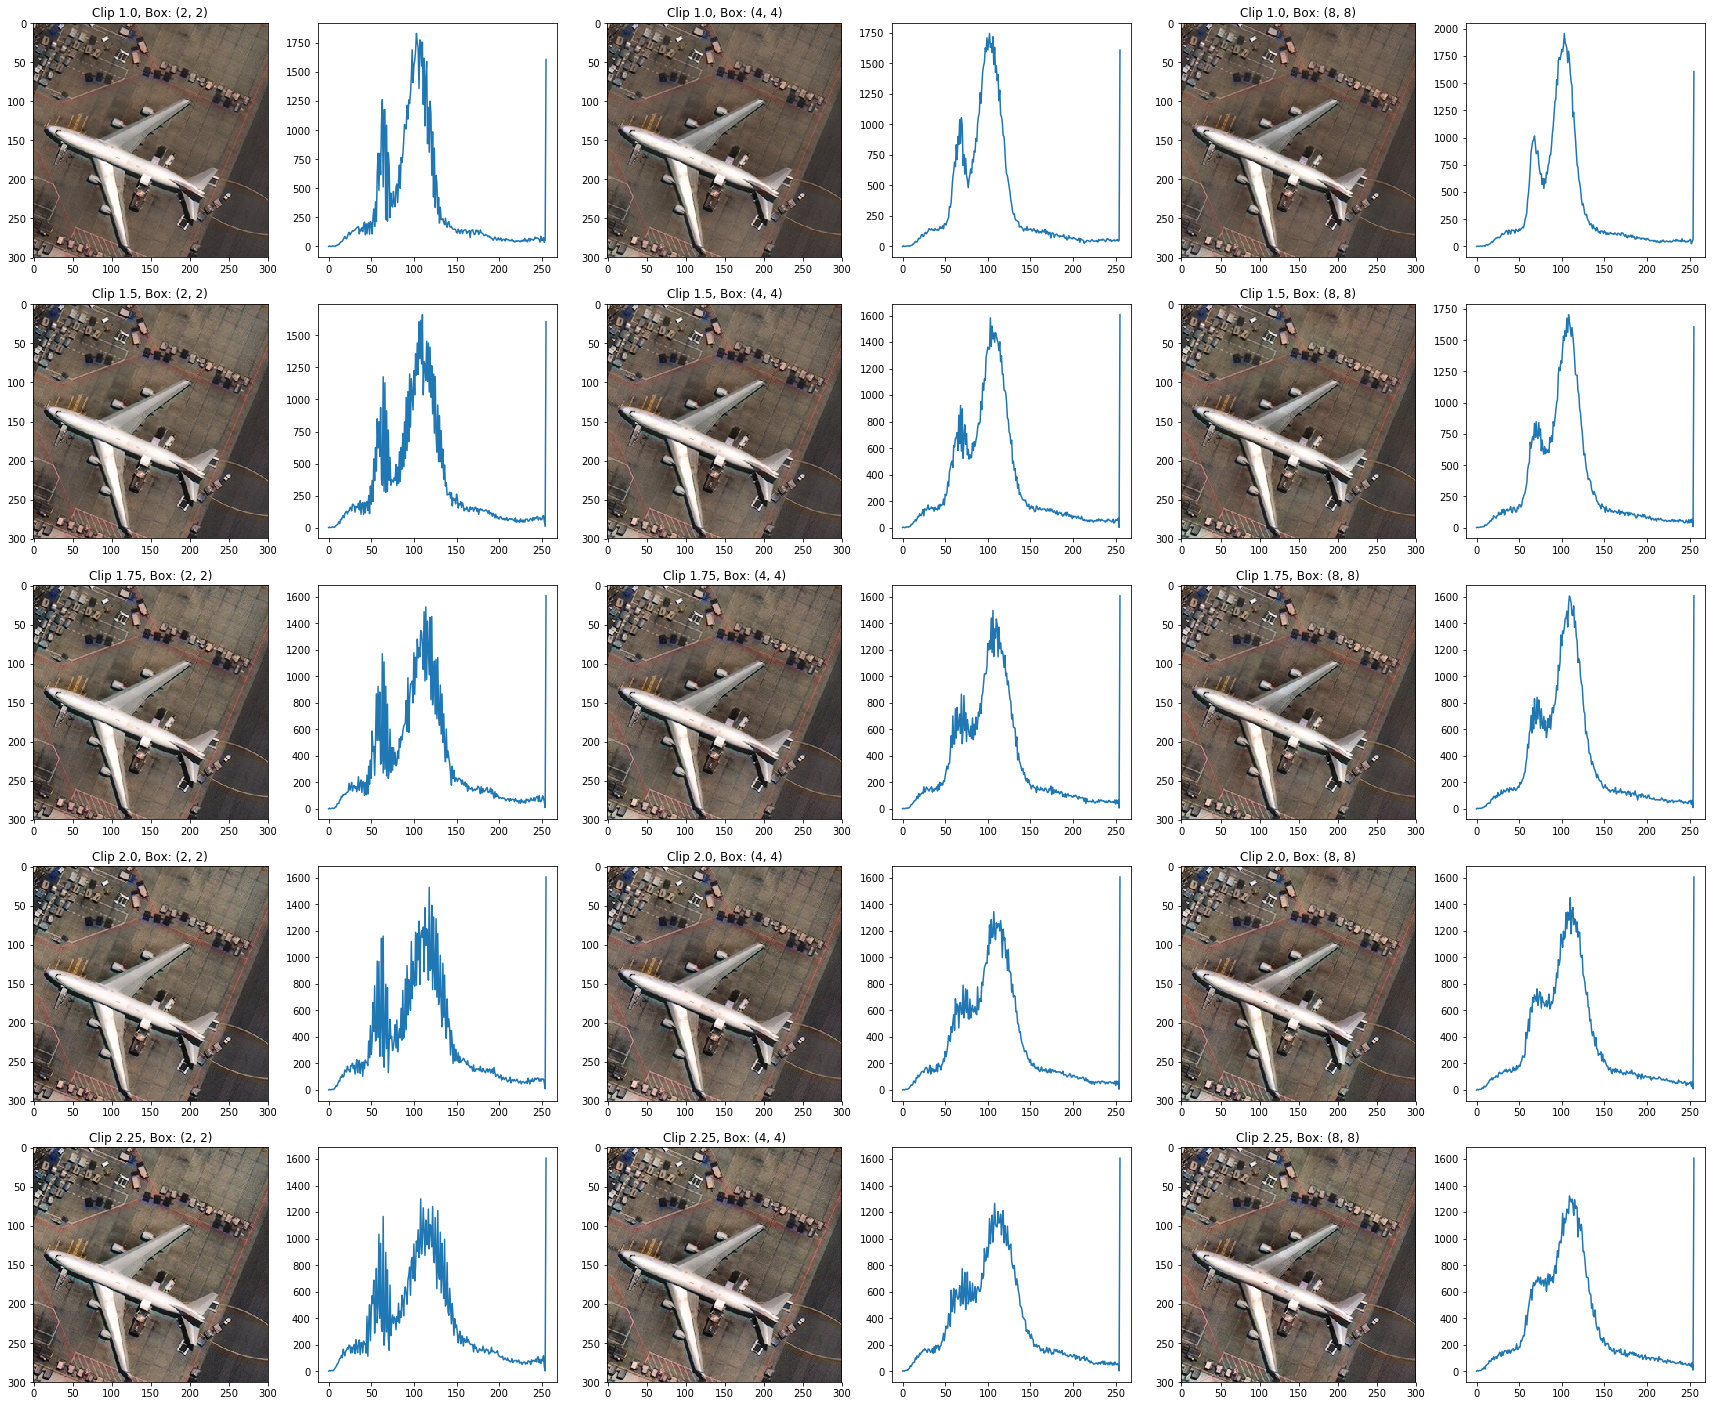

In [8]:
clip = [1.0, 1.5, 1.75, 2.0, 2.25]
box = [(2,2), (4,4), (8,8)]

num_c = len(clip)
num_b = len(box)

fig, ax = plt.subplots(num_c, num_b *2, figsize = (10*num_b, 5*num_c))

c_ind = 0
b_ind = 0

for c in clip:
    for b in box:
        c_img = clahe_rgb(img, c, b)
        ax[c_ind,b_ind].title.set_text('Clip {}, Box: {}'.format(c,b))
        ax[c_ind,b_ind].imshow(c_img)
        b_ind += 1
        
        histr = cv2.calcHist([c_img],[0],None,[256],[0,256]) 
        ax[c_ind, b_ind].plot(histr) 
        b_ind += 1
        
    b_ind = 0
    c_ind += 1


### Step 3: Try it again with a couple of other images